Text(0.5, 1.0, 'Maximum absolute error:  0.0099')

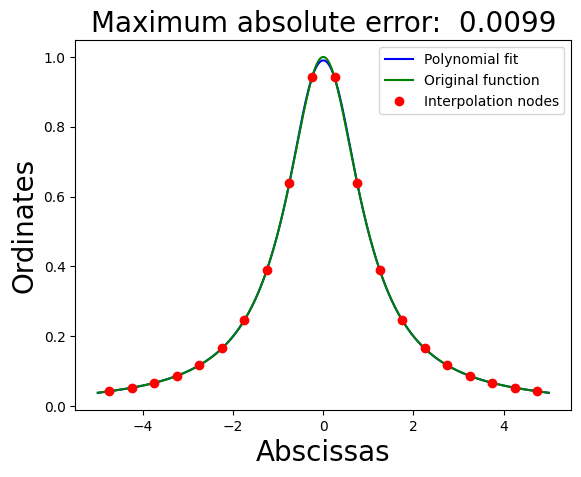

In [10]:
from pylab import *

ion()
from scipy.linalg import solve


def PolyLagrange(absc, ordi, x):
    """Evaluates at x the polynomial passing through the points having
abscissas 'absc' and ordinates 'ordi' using Lagrange's method.

Input:

absc, ordi: 1D arrays or iterable python objects that convert to 1D
            array. They must have the same length.

x: 1D array or a number

Output: 1D array of same length as x, or a number if x is a number.

    """
    absc = array(absc)
    ordi = array(ordi)
    if shape(absc) != shape(ordi):
        raise ValueError("Abscissas and ordinates have different length!")
    if len(shape(absc)) != 1:
        raise ValueError("Abscissas and ordinates must be 1D objects!")
    Npts = len(absc)
    product = ones((Npts,) + shape(x))
    for i in range(Npts):
        for j in range(Npts):
            if i == j: continue
            product[i] *= (x - absc[j]) / (absc[i] - absc[j])
    return dot(ordi, product)


def NewtonPoly(absc, ordi, x):
    absc = array(absc)
    ordi = array(ordi)
    if shape(absc) != shape(ordi):
        raise ValueError("Abscissas and ordinates have different length!")
    if len(shape(absc)) != 1:
        raise ValueError("Abscissas and ordinates must be 1D objects!")
    Npts = len(absc)
    coef = zeros((Npts, Npts))
    coef[:, 0] = ordi
    for j in range(1, Npts):
        for i in range(Npts - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (absc[i + j] - absc[i])
    product = ones((Npts,) + shape(x))
    for i in range(1, Npts):
        for j in range(i):
            product[i] *= (x - absc[j])

    return dot(coef[0], product)


def ChebiShevZeroes(a, b, n):
    k = arange(1, n + 1)
    zeroes = cos(((2 * k - 1) * pi) / (2 * n))
    rescaled_zeroes = (((b - a) * zeroes) / 2) + ((a + b) / 2)
    return rescaled_zeroes


# ------------------------------------------------------------
# Hints for exercise n.3
def SplineCoefficients(absc, ordi):
    """Computes a matric containing the coefficients of the polynomials
forming a set of natural cubic splines interpolating the points (absc, ordi).

Input:

absc, ordi: 1D arrays or iterable python objects that convert to 1D
            array. They must have the same length. absc must be ordered
            in growing order.

Output: 

A matrix with four columns and as many rows as the elements in absc
minus one. If c0, c1, c2, c3 are the elements along the i-th row, the
corresponding interpolating polynomial is 

S_i(x)=c0 + c1*(x - absc[i]) + c2*(x - absc[i])**2 + c3*(x - absc[i])**3

    """
    # Delete 'pass' and put here your code.
    # To solve eq. 3.24 in the book, use
    #    c = solve(A,K)
    # where A is the matrix containing the deltas and K is the vector
    # of the know solutions (you must prepare them both).
    # 'solve' has been imported at the beginning of this code.
    n = len(absc)
    coef = zeros((n - 1, 4))
    deltaX = zeros(n - 1)
    deltaY = zeros(n - 1)
    k = zeros(n)
    a = zeros((n, n))

    for i in range(n - 1):
        coef[i][0] = ordi[i]
        deltaX[i] = absc[i + 1] - absc[i]
        deltaY[i] = ordi[i + 1] - ordi[i]
    a[0][0] = 1
    a[n - 1][n - 1] = 1

    for i in range(1, n - 1):
        a[i][i - 1] = deltaX[i - 1]
        a[i][i] = 2 * (deltaX[i - 1] + deltaX[i])
        a[i][i + 1] = deltaX[i]
        k[i] = 3 * (deltaY[i] / deltaX[i] - deltaY[i - 1] / deltaX[i - 1])

    c = solve(a, k)

    for i in range(n - 1):
        coef[i][2] = c[i]
        coef[i][3] = (c[i + 1] - c[i]) / (3 * deltaX[i])
        coef[i][1] = (deltaY[i] / deltaX[i]) - (deltaX[i] / 3) * (2 * c[i] + c[i + 1])

    return coef


def __evaluate_spline(coeff, absc, x):
    """Don't use this directly. Call 'evaluate_spline', instead."""
    # Delete 'pass' and put here your code.  It might useful to know
    # that, if a is ordered in growing order, as it should be, then
    #  'searchsorted(a, x)'
    # returns the index of the smallest element in a which is larger
    # than x
    index = searchsorted(absc, x)

    if index == len(absc):
        index -= 1

    if index == 0:
        a, b, c, d = coeff[0]
        xi = absc[0]
    else:
        a, b, c, d = coeff[index - 1]
        xi = absc[index - 1]

    return a + b * (x - xi) + c * (x - xi) ** 2 + d * (x - xi) ** 3


def evaluate_spline(coeff, absc, x):
    """Evaluates at x the the natural spline interpolant.

Input:

coeff:  matrix containinig the coefficients of the cubic interpolants.
        This is the output of 'SplineCoefficients'.

absc:   the same abscissas passed to 'SplineCoefficients' to compute 'coeff'.

x:      1D array or a number

Output: 1D array of same length as x, or a number if x is a number.

    """
    # x is a number
    if shape(x) == ():
        p = __evaluate_spline(coeff, absc, x)
    # x is a 1D array, or list, or tuple
    else:
        x = array(x)
        p = zeros_like(x)
        for i in range(len(x)):
            p[i] = __evaluate_spline(coeff, absc, x[i])
    return p


# ------------------------------------------------------------


ion()
function = lambda x: 1. / (1 + x ** 2)
interval = [-5, 5]
Npts = 20
# L = interval[1] - interval[0]
# x = linspace(interval[0], interval[1], 1001)

# max_errors_lagrange = []
# max_errors_newton = []
# max_errors_spline = []
# N_range = range(3, 41)

# for Npts in N_range:
#     # a = linspace(interval[0] + L/Npts/2, interval[1] - L/Npts/2 , Npts)
#     a = sort(ChebiShevZeroes(interval[0], interval[1], Npts))
#     o = function(a)

#     p_Lagrange = PolyLagrange(a, o, x)

#     p_Newton = NewtonPoly(a, o, x)

#     coeff = SplineCoefficients(a, o)
#     p_Spline = evaluate_spline(coeff, a, x)

#     max_errors_lagrange.append(amax(fabs(p_Lagrange - function(x))))
#     max_errors_newton.append(amax(fabs(p_Newton - function(x))))
#     max_errors_spline.append(amax(fabs(p_Spline - function(x))))

##constant interval abscissas
a = linspace(interval[0] + L/Npts/2, interval[1] - L/Npts/2 , Npts)
# a = sort(ChebiShevZeroes(interval[0], interval[1], Npts))
o = function(a)
# p = PolyLagrange(a, o, x)
# p = NewtonPoly(a, o, x)
coeff = SplineCoefficients(a,o)
p = evaluate_spline(coeff,a,x)

##figure(1)
# plot(N_range, max_errors_lagrange, 'b-',
#      N_range, max_errors_newton, 'r-',
#      N_range, max_errors_spline, 'g-')
# xlabel("Number of Interpolation Points N", fontsize=20)
# ylabel("Maximum Absolute Error(log)", fontsize=20)
# legend(["Lagrange", "Newton", "CubicSpline"],
#        loc="upper center")
# yscale('log')

plot(x, p,           'b-',
    x, function(x), 'g-',
    a, o,           'or')
xlabel("Abscissas", fontsize=20)
ylabel("Ordinates", fontsize=20)
legend(["Polynomial fit", "Original function", "Interpolation nodes"],
      loc="upper right")
title("Maximum absolute error: {:7.4f}".format(amax(fabs(p - function(x)))), fontsize=20 )
